In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [169]:
d_train = pd.read_csv('train_BigMart_Sales.csv')
d_test = pd.read_csv('test_BigMart_sales.csv')

In [170]:
print(d_train.head())
print(d_train.tail())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat            0.016   
1           DRC01        5.920          Regular            0.019   
2           FDN15       17.500          Low Fat            0.017   
3           FDX07       19.200          Regular            0.000   
4           NCD19        8.930          Low Fat            0.000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy   249.809            OUT049   
1            Soft Drinks    48.269            OUT018   
2                   Meat   141.618            OUT049   
3  Fruits and Vegetables   182.095            OUT010   
4              Household    53.861            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [171]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [172]:
d_train.Item_Identifier.nunique()

1559

In [173]:
categoris = d_train.dtypes =='object'

In [174]:
d_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [175]:
d_train.shape

(8523, 12)

In [176]:
y = d_train.pop('Item_Outlet_Sales')

In [177]:
data = pd.concat([d_train, d_test])

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [179]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [180]:
categories = data.dtypes == 'object'

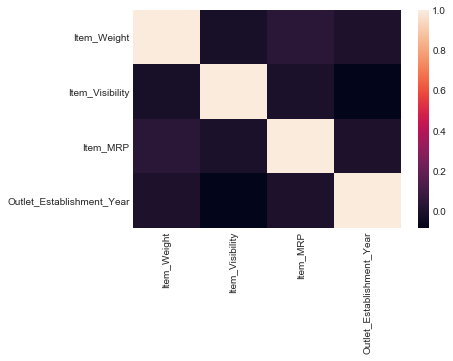

In [181]:
sns.heatmap(data.corr())

In [182]:
data = data.drop(['Item_Identifier'], axis=1)

In [183]:
del categories['Item_Identifier']

In [184]:
categories = []
numeric = []
for a in data.columns :
    if data.dtypes[a] == 'object':
        categories.append(a)
    else :
        numeric.append(a)

In [185]:
for b in categories :
    print(data[b].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9

In [186]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000,14204.000,14204.000,14204.000
mean,12.793,0.066,141.005,1997.831
std,4.653,0.051,62.087,8.372
min,4.555,0.000,31.290,1985.000
25%,8.710,0.027,94.012,1987.000
50%,12.600,0.054,142.247,1999.000
75%,16.750,0.094,185.856,2004.000
max,21.350,0.328,266.888,2009.000


In [187]:
data[data['Item_Visibility']==0].shape[0]

879

In [188]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['LF','reg','low fat'], ['Low Fat', 'Reguler', 'Low Fat'])

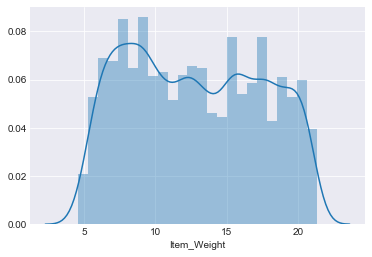

In [189]:
sns.distplot(data['Item_Weight'].dropna())
plt.show()

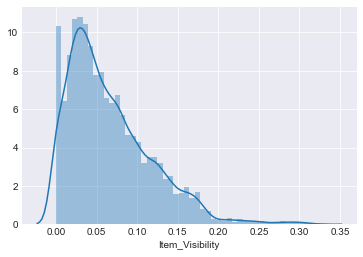

In [190]:
sns.distplot(data.Item_Visibility)
plt.show()

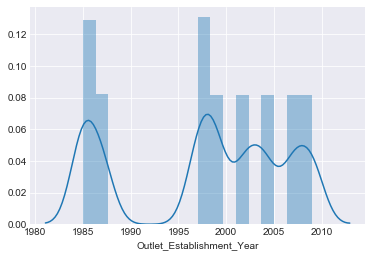

In [191]:
sns.distplot(data['Outlet_Establishment_Year'])
plt.show()

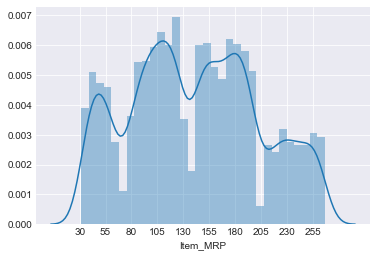

In [192]:
sns.distplot(data['Item_MRP'])
plt.xticks(np.arange(30, 270, 25))
plt.show()

In [193]:
data.Item_MRP = pd.qcut(data.Item_MRP, 4, labels=['very cheap', 'cheap', 'normal', 'expensive'])

In [194]:
data['Outlet_Establishment_Year'].describe()

count   14204.000
mean     1997.831
std         8.372
min      1985.000
25%      1987.000
50%      1999.000
75%      2004.000
max      2009.000
Name: Outlet_Establishment_Year, dtype: float64

In [195]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [196]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].replace([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], ['ordinary', 'new', 'ordinary','old', 'old', 'new','new', 'ordinary',
                                                                                                  'new'])

In [197]:
data.Item_Weight = data['Item_Weight'].fillna(12.793)

In [198]:
data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [199]:
data.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [200]:
data.Item_Visibility=data.Item_Visibility.replace(0, np.nan)

In [201]:
data.Item_Visibility = data.Item_Visibility.fillna(0.066)

In [202]:
pd.crosstab(data.Outlet_Size, data.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [210]:
data = data.drop(['Outlet_Size'], axis=1)

In [211]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [203]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 9 columns):
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null category
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: category(1), float64(2), object(6)
memory usage: 1.3+ MB


In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
np.random.seed(21)

x = pd.get_dummies(data.iloc[:8523, :])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

RFG_s = RandomizedSearchCV(RandomForestRegressor(), {'n_estimators':np.arange(10,100,20), 'max_depth':np.arange(1,10,2),
                                                    'min_samples_split':np.arange(2, 200, 20), 'min_samples_leaf':np.arange(1,10,2),
                                                    'max_features':np.arange(1, 10, 2)}, cv=4, n_iter=8)

RFG_s.fit(x_train, y_train)

pred_train = RFG_s.predict(x_train)
pred_test = RFG_s.predict(x_test)

print(np.sqrt(mean_squared_error(y_train, pred_train)))
print(np.sqrt(mean_squared_error(y_test, pred_test)))

1173.695386071144
1175.3174130705609


In [233]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Elastic = GridSearchCV(ElasticNet(normalize=True), {'alpha':np.logspace(-5,5,10), 'l1_ratio':np.arange(0,1,10)})

Elastic.fit(x_train, y_train)

pred_train_1 = Elastic.predict(x_train)
pred_test_1 = Elastic.predict(x_test)

print(np.sqrt(mean_squared_error(y_train, pred_train_1)))
print(np.sqrt(mean_squared_error(y_test, pred_test_1)))

1162.1558321120503
1159.8787795558508


In [250]:
import xgboost as xgb

xgbr = RandomizedSearchCV(xgb.XGBRegressor(), {'max_depth':np.arange(2, 10,2), 'learning_rate':np.arange(0.1,0.2,1), 'n_estimators':np.arange(50,200,30), 
'colsample_bytree':np.arange(0.1,1,0.2), 'reg_alpha':np.arange(0,1,0.2), 'reg_lambda':np.arange(0,1,0.2)},
                         scoring = 'neg_mean_squared_error')

xgbr.fit(x_train, y_train)
pred_test_2 = xgbr.predict(x_test)

print(np.sqrt(abs(xgbr.best_score_)))
print(np.sqrt(mean_squared_error(y_test, pred_test_2)))

1123.2108587009554
1115.3430523022787


In [251]:
xgbr.fit(x, y)

test = pd.get_dummies(data.iloc[8523:, :])

act_pred = xgbr.predict(test)

In [253]:
submission = pd.read_csv('bigmart_submission.csv')

In [257]:
submission.Item_Outlet_Sales = act_pred

In [258]:
submission.to_csv('bigmart_result.csv')